In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

/Users/chayastern/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
param = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf', '../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = ['HF/butane_scan_0_neg.log', 'HF/butane_scan_0_pos.log', 'HF/butane_scan_180_neg.log',
        'HF/butane_scan_180_pos.log']

In [7]:
butane_scan_0_neg = ScanSet.parse_psi4(scan[0], structure)
butane_scan_0_pos = ScanSet.parse_psi4(scan[1], structure)
butane_scan_180_neg = ScanSet.parse_psi4(scan[2], structure)
butane_scan_180_pos = ScanSet.parse_psi4(scan[3], structure)
butane_scan.compute_energy(param)

# Save pdb trajectory of scan
butane_scan.save_pdb('butane_traj.pdb')

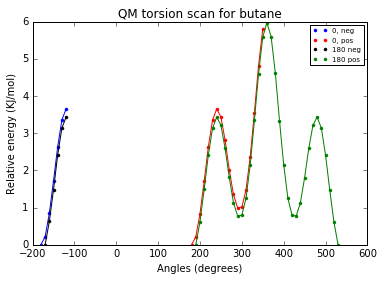

In [24]:
plt.plot(butane_scan_0_neg.steps, butane_scan_0_neg.qm_energy, '.', color='blue', label='0, neg')
plt.plot(butane_scan_0_neg.steps, butane_scan_0_neg.qm_energy, color='blue')

plt.plot(butane_scan_0_pos.steps, butane_scan_0_pos.qm_energy, '.', color='red', label='0, pos')
plt.plot(butane_scan_0_pos.steps, butane_scan_0_pos.qm_energy, color='red')

plt.plot(butane_scan_180_neg.steps, butane_scan_180_neg.qm_energy, '.', color='black', label='180 neg')
plt.plot(butane_scan_180_neg.steps, butane_scan_180_neg.qm_energy, color='black')

plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy, '.', color='green', label='180 pos')
plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy, color='green')


plt.xlabel('Angles (degrees)')
plt.ylabel('Relative energy (KJ/mol)')
plt.title('QM torsion scan for butane')
plt.legend(prop={'size':7})
plt.savefig('Butane_torsion_scan.pdf')
#plt.plot(butane_scan.steps, butane_scan.mm_energy, '.')

When I do a torsion scan of butane in psi4, the geometry optimization of structures with dihedrals between 0 and 180 don't converge. I have no idea why. 

I tried running from -180 in the positive and negative direction:

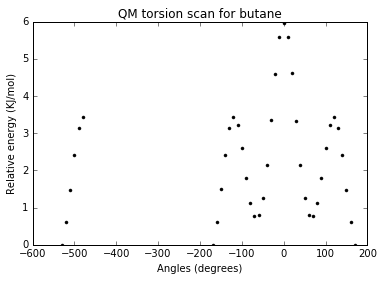

In [11]:
scan = ['HF/butane_scan_n180_neg.log', 'HF/butane_scan_n180_pos.log']
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

# save trajectory
butane_scan.save_pdb('butane_traj_n180.pdb')

plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.xlabel('Angles (degrees)')
plt.ylabel('Relative energy (KJ/mol)')
plt.title('QM torsion scan for butane')
plt.savefig('Butane_torsion_scan_n180.pdf')

In this case, the structures between 0 and 180 do converge. 

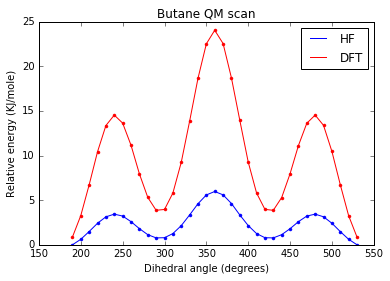

In [12]:
scan_DFT = ['DFT_b3lyp/butane_scan_b3lyp_360.log']
butane_scan_DFT = ScanSet.parse_psi4(scan_DFT, structure)

plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy,'.', color='blue')
plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy, color='blue', label='HF')
plt.plot(butane_scan_DFT.steps, butane_scan_DFT.qm_energy,'.', color='red')
plt.plot(butane_scan_DFT.steps, butane_scan_DFT.qm_energy, color='red', label='DFT')
plt.legend()
plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Relative energy (KJ/mole)')
plt.title('Butane QM scan')

Why are the DFT structures higher in energy than HF?